In [3]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

#mechanism_file = 'h2o2.yaml'
#mechanism_file = 'gri30.yaml'
mechanism_file = 'Chemical mechanisms/BurkeH2.yaml'
phi = 0.6
T_ref = 298.0 #K
P_ref = 5.0 #bar

#flame parameters
width = 0.01

#gas setup
gas = ct.Solution(mechanism_file)
gas.set_equivalence_ratio(phi, 'H2', {'O2':1, 'N2': 3.76})
gas.TP = T_ref, P_ref * ct.one_atm
print(f"T = {gas.T}, P = {gas.P}, density = {gas.density}, Y = {gas.Y}")

#flame setup
f = ct.FreeFlame(gas, width=width)
#f.set_refine_criteria(ratio=2.0, slope=0.06, curve=0.12)
f.set_refine_criteria(ratio=3, slope=0.07, curve=0.14)
#f.transport_model = 'mixture-averaged' 0.33951146817215705
f.transport_model = 'multicomponent'

#solve
f.solve(loglevel=1, auto=True)
#f.show()

print(f.velocity[0]*100)
#print(f.T)

T = 298.0, P = 506625.0, density = 4.7944768634, Y = [0.01731093 0.22896627 0.         0.         0.         0.
 0.         0.         0.75372279]

************ Solving on 8 point grid with energy equation enabled ************

..............................................................................

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 8.009e-06  log(ss)= 4.517     

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 0.0001026  log(ss)= 5.285     

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 1.927e-06  log(ss)= 7.147     

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 1.097e-05  log(ss)= 6.069     

Attempt Newton solution of steady-state 

In [14]:
z = 100 * f.grid #conversion to cm
dTdz = np.gradient(f.T, z)
d_L = (max(f.T) - min(f.T)) / max(dTdz)

print(d_L)
       

0.03636061069015645


In [15]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

#mechanism_file = 'h2o2.yaml'
mechanism_file = 'gri30.yaml'
phi = 0.6
T_ref = 298.0 #K
P_ref = 1.0 #bar

#flame parameters
width = 0.03

#gas setup
gas = ct.Solution(mechanism_file)
gas.set_equivalence_ratio(phi, 'H2', {'O2':1, 'N2': 3.76})
gas.TP = T_ref, P_ref * ct.one_atm
print(f"T = {gas.T}, P = {gas.P}, density = {gas.density}, Y = {gas.Y}")

#flame setup
#f = ct.FreeFlame(gas, width=width)
#f.set_refine_criteria(ratio=2.0, slope=0.06, curve=0.12)
#f.transport_model = 'mixture-averaged'
#f.max_time_step = 1e-6  # Reduce the max step size
#f.advance(1e-6)  # Advance by a very small step
#f.show()

#solve
gas.equilibrate('HP')
#f.show()

#f.transport_model = 'mixture-averaged'
#print(f.velocity)
print(gas.T)

T = 298.0, P = 101324.99999999999, density = 0.9588953726799999, Y = [0.01731093 0.         0.         0.22896627 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.75372279
 0.         0.         0.         0.         0.        ]
1836.538074490185


In [ ]:
rho 

In [1]:
import cantera as ct
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.constrained_layout.use'] = True

# Define the gas mixture and kinetics used to compute mixture properties
# In this case, we are using the GRI 3.0 model with methane as the fuel
mech_file = "gri30.yaml"
fuel_comp = {"CH4": 1.0}

# Inlet temperature in kelvin and inlet pressure in pascals
# In this case we are setting the inlet T and P to room temperature conditions
To = 300
Po = ct.one_atm

# Domain width in metres
width = 0.014


# Create the object representing the gas and set its state to match the inlet conditions
gas = ct.Solution(mech_file)
gas.TP = To, Po
gas.set_equivalence_ratio(1.0, fuel_comp, {"O2": 1.0, "N2": 3.76})

flame = ct.FreeFlame(gas, width=width)
flame.set_refine_criteria(ratio=3, slope=0.07, curve=0.14)

flame.solve(loglevel=1, auto=True)


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 2.136e-05  log(ss)= 5.493     

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 0.0003649  log(ss)= 4.613     

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 0.006235   log(ss)= 3.334     

Attempt Newton solution of steady-state problem.
Newton steady-state solve succeeded.

Problem solved on [9] point grid(s).
Expanding domain to accommodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6

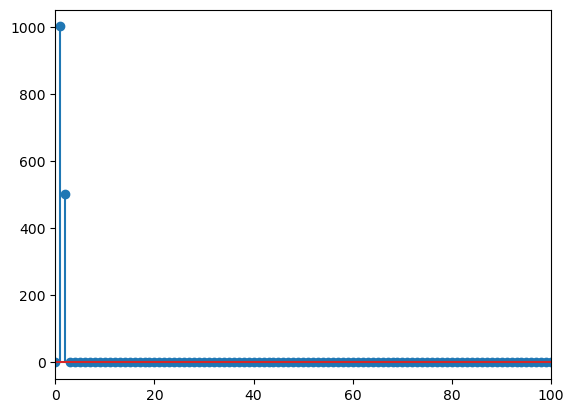

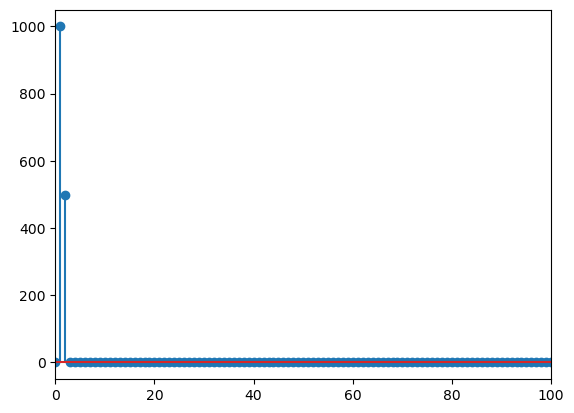

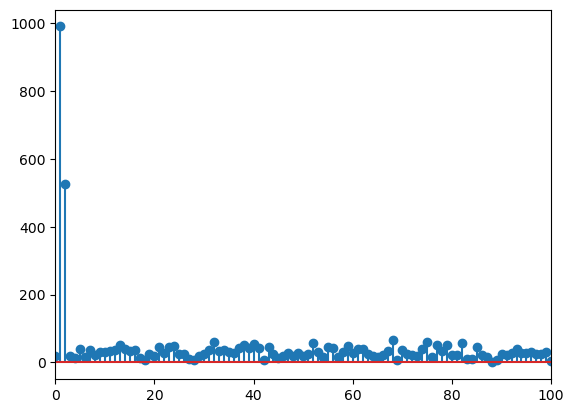

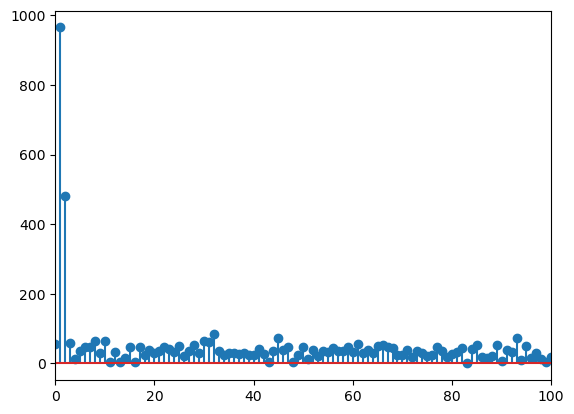

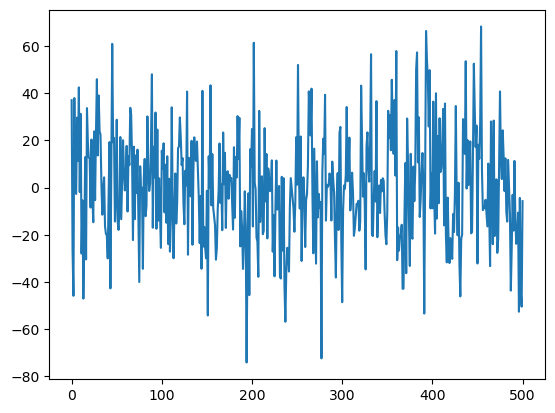

In [49]:
import numpy as np
import finufft
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


def f(x, k=1):
    return np.cos(k * x) + 0.5 * np.cos(2*k*x)

n = 2000
x = np.linspace(0,2 * np.pi, n)
c = f(x)
n_modes = 1001

amp = finufft.nufft1d1(x, np.asarray(c, dtype=np.complex128), n_modes, isign=+1)
pos_ind = len(amp) // 2
amp = np.abs(amp[pos_ind:])
k = [i for i in range(0, pos_ind+1)]

plt.stem(k, amp)
plt.xlim(0,100)
plt.show()

nu_3 = 2000
x_nu_3 = np.sort(np.random.uniform(0, 2 * np.pi, nu_3))
x_3 = np.linspace(x_nu_3[0], x_nu_3[-1], nu_3)
c_interp = interp1d(x_nu_3, f(x_nu_3), kind='cubic')
c_uniform = c_interp(x_3)

amp = finufft.nufft1d1(x_3, np.asarray(c_uniform, dtype=np.complex128), n_modes, isign=+1)
pos_ind = len(amp) // 2
amp = np.abs(amp[pos_ind:])
k = [i for i in range(0, pos_ind+1)]

plt.stem(k, amp)
plt.xlim(0,100)
plt.show()

nu = 2000
x_nu = np.sort(np.random.uniform(0, 2 * np.pi, nu))
c_nu = f(x_nu)
amp_nu = finufft.nufft1d1(x_nu, np.asarray(c_nu, dtype=np.complex128), n_modes, isign=+1)
pos_ind_nu = len(amp_nu) // 2
amp_nu = np.abs(amp_nu[pos_ind_nu:])
k_nu = [i for i in range(0, pos_ind_nu+1)]
plt.stem(k_nu, amp_nu)
plt.xlim(0,100)
plt.show()

nu_2 = 2000
x_nu_2 = np.sort(np.random.uniform(0, 2 * np.pi, nu_2))
c_nu_2 = f(x_nu_2)
amp_nu_2 = finufft.nufft1d1(x_nu_2, np.asarray(c_nu_2, dtype=np.complex128), n_modes, isign=+1)
pos_ind_nu_2 = len(amp_nu_2) // 2
amp_nu_2 = np.abs(amp_nu_2[pos_ind_nu_2:])
k_nu_2 = [i for i in range(0, pos_ind_nu_2+1)]
plt.stem(k_nu_2, amp_nu_2)
plt.xlim(0,100)
plt.show()
plt.plot(k_nu_2, amp_nu_2-amp_nu)
plt.show()

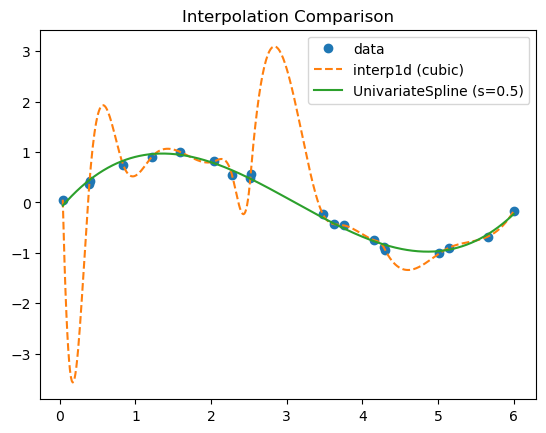

In [2]:
from scipy.interpolate import interp1d, UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt

# Noisy data
x = np.sort(np.random.rand(20) * 2*np.pi)
y = np.sin(x) + 0.1 * np.random.randn(len(x))

x_dense = np.linspace(x[0], x[-1], 500)

# Exact interpolation (will follow noise)
f_interp = interp1d(x, y, kind='cubic')(x_dense)

# Smooth spline interpolation
f_spline = UnivariateSpline(x, y, s=0.1)(x_dense)

plt.plot(x, y, 'o', label='data')
plt.plot(x_dense, f_interp, label='interp1d (cubic)', linestyle='--')
plt.plot(x_dense, f_spline, label='UnivariateSpline (s=0.5)', linestyle='-')
plt.legend()
plt.title("Interpolation Comparison")
plt.show()


In [ ]:
print(np.linspace(1/3, 50, 150))
test

[ 0.33333333  0.66666667  1.          1.33333333  1.66666667  2.
  2.33333333  2.66666667  3.          3.33333333  3.66666667  4.
  4.33333333  4.66666667  5.          5.33333333  5.66666667  6.
  6.33333333  6.66666667  7.          7.33333333  7.66666667  8.
  8.33333333  8.66666667  9.          9.33333333  9.66666667 10.
 10.33333333 10.66666667 11.         11.33333333 11.66666667 12.
 12.33333333 12.66666667 13.         13.33333333 13.66666667 14.
 14.33333333 14.66666667 15.         15.33333333 15.66666667 16.
 16.33333333 16.66666667 17.         17.33333333 17.66666667 18.
 18.33333333 18.66666667 19.         19.33333333 19.66666667 20.
 20.33333333 20.66666667 21.         21.33333333 21.66666667 22.
 22.33333333 22.66666667 23.         23.33333333 23.66666667 24.
 24.33333333 24.66666667 25.         25.33333333 25.66666667 26.
 26.33333333 26.66666667 27.         27.33333333 27.66666667 28.
 28.33333333 28.66666667 29.         29.33333333 29.66666667 30.
 30.33333333 30.66666667 

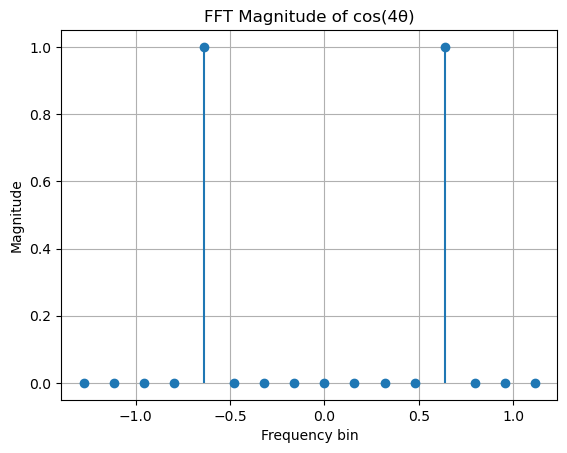

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 16
theta = np.linspace(0, 2*np.pi, N, endpoint=False)
f = np.cos(4 * theta)

F = np.fft.fft(f)
freqs = np.fft.fftfreq(N, 2*np.pi/N)
A = abs(F) * 2 / N

plt.stem(freqs, A, basefmt=" ")
plt.title("FFT Magnitude of cos(4θ)")
plt.xlabel("Frequency bin")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import interp1d, Akima1DInterpolator
from numpy.typing import NDArray
from typing import Tuple, List, Optional

def isoline_1d_series_v2(
    array_data: NDArray,
    array_x: NDArray,
    contour_level: float,
    stream_referential: Tuple[str, str] = ("x", "y"),
    interpolation_scheme: str = "cubic",
    percentage_remove: float = 0,
) -> NDArray:
    """Input: arrays of data and x, value of the isoline
    Opt: stream/crosswise direction of the flow (x,y by default), interpolation scheme (cubic by default)
    percentage a value to remove near the boundaries (0 by default)
    Output: return the coordinates of the isoline"""

    # Intialisation
    if stream_referential[0] == "x":
        array_data_ref = array_data
    elif stream_referential[0] == "y":
        array_data_ref = array_data.T
    else:
        print("ERROR referential")
        return

    nb_x, nb_y = array_data_ref.shape
    array_x_iso = np.zeros(nb_y)
    vmin, vmax = array_data_ref[0, 0], array_data_ref[-1, 0]

    # Inverse bounds if decreasing array
    if vmin > vmax:
        vmin, vmax = vmax, vmin

    lower_bound = vmin + (contour_level - vmin) * percentage_remove
    upper_bound = vmax - (vmax - contour_level) * percentage_remove

    # For each x location
    for i in range(nb_y):
        # Remove the temperatures close to the boundaries (necessary for interpolation)
        array_data_x = array_data_ref[:, i]

        mask = (array_data_x > lower_bound) & (array_data_x < upper_bound)
        array_data_x = array_data_x[mask]
        array_x_filtered = array_x[mask]

        # Remove duplicate values (keep only the first occurrence)
        unique_indices = np.unique(array_data_x, return_index=True)[1]
        array_data_x = array_data_x[unique_indices]
        array_x_filtered = array_x_filtered[unique_indices]

        # Interpolate
        if interpolation_scheme == "akima":
            f = Akima1DInterpolator(array_data_x, array_x_filtered)
        else:
            f = interp1d(array_data_x, array_x_filtered, kind=interpolation_scheme)

        # Look for the isoline
        x_iso = f(contour_level)
        array_x_iso[i] = x_iso

    return array_x_iso